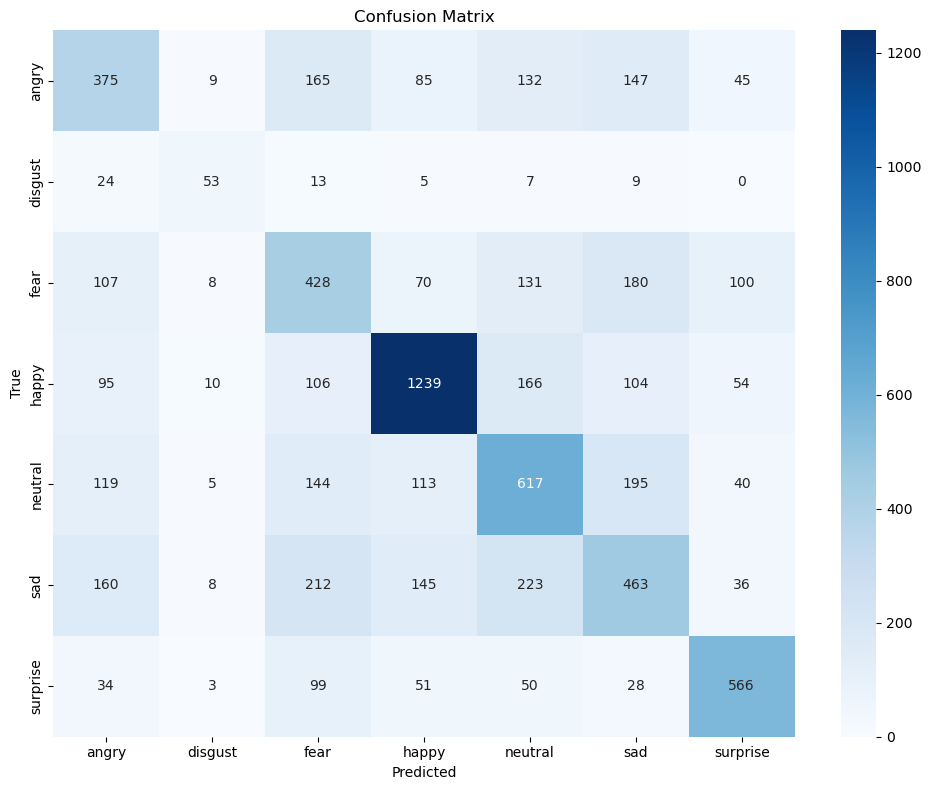

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

mlp_cmatrix = [
    [375, 9, 165, 85, 132, 147, 45],
    [24, 53, 13, 5, 7, 9, 0],
    [107, 8, 428, 70, 131, 180, 100],
    [95, 10, 106, 1239, 166, 104, 54],
    [119, 5, 144, 113, 617, 195, 40],
    [160, 8, 212, 145, 223, 463, 36],
    [34, 3, 99, 51, 50, 28, 566]
]

rnn_cmatrix = [
    [100, 1, 109, 257, 204, 177, 110],
    [10, 4, 20, 30, 25, 10, 12],
    [48, 1, 192, 210, 226, 166, 181],
    [69, 2, 121, 1123, 183, 168, 108],
    [63, 1, 110, 275, 510, 211, 63],
    [68, 0, 141, 264, 332, 354, 88],
    [38, 0, 94, 101, 65, 61, 472]
]

plt.figure(figsize=(10, 8))
sns.heatmap(mlp_cmatrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, 
            yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('mlp_confusion_matrix.png')
plt.show()

    

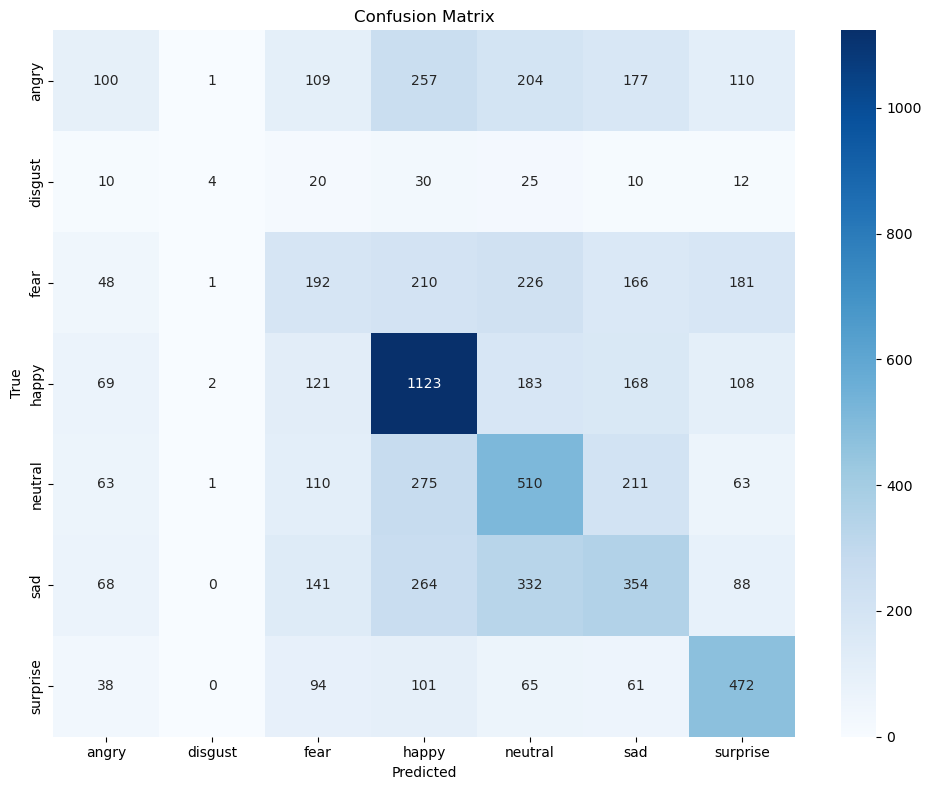

In [2]:
plt.figure(figsize=(10, 8))
sns.heatmap(rnn_cmatrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, 
            yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('rnn_confusion_matrix.png')
plt.show()

In [5]:
def precision(cmatrix, labels):
    stats = {}
    for lab in range(len(labels)):
        c_tp = cmatrix[lab][lab]
        fp = 0
        for cf in range(len(labels)):
            if cf == lab:
                continue
            fp += cmatrix[cf][lab]
        stats[labels[lab]] = (c_tp) / (c_tp + fp)
    return stats


In [6]:
precision(rnn_cmatrix, classes)

{'angry': 0.25252525252525254,
 'disgust': 0.4444444444444444,
 'fear': 0.24396442185514614,
 'happy': 0.49690265486725665,
 'neutral': 0.3300970873786408,
 'sad': 0.3086312118570183,
 'surprise': 0.4564796905222437}

In [7]:
precision(mlp_cmatrix, classes)

{'angry': 0.4102844638949672,
 'disgust': 0.5520833333333334,
 'fear': 0.3667523564695801,
 'happy': 0.7254098360655737,
 'neutral': 0.46530920060331826,
 'sad': 0.411190053285968,
 'surprise': 0.6730083234244947}

In [8]:
def recall(cmatrix, labels):
    stats = {}
    for lab in range(len(labels)):
        c_tp = cmatrix[lab][lab]
        fn = 0
        for cf in range(len(labels)):
            if cf == lab:
                continue
            fn += cmatrix[lab][cf]
        stats[labels[lab]] = (c_tp) / (c_tp + fn)
    return stats

In [10]:
recall(rnn_cmatrix, classes)

{'angry': 0.10438413361169102,
 'disgust': 0.036036036036036036,
 'fear': 0.1875,
 'happy': 0.6330326944757609,
 'neutral': 0.41362530413625304,
 'sad': 0.2838813151563753,
 'surprise': 0.5679903730445247}

In [12]:
recall(mlp_cmatrix, classes)

{'angry': 0.3914405010438413,
 'disgust': 0.4774774774774775,
 'fear': 0.41796875,
 'happy': 0.6984216459977453,
 'neutral': 0.5004055150040552,
 'sad': 0.37129109863672816,
 'surprise': 0.681107099879663}

In [13]:
def f1_score(cmatrix, labels):
    f1_stats = {}
    p_stats = precision(cmatrix, labels)
    r_stats = recall(cmatrix, labels)

    for label in labels:
        f1_stats[label] = (p_stats[label] * r_stats[label]) / (p_stats[label] + r_stats[label]) 
    return f1_stats


In [14]:
f1_score(rnn_cmatrix, classes)

{'angry': 0.07385524372230429,
 'disgust': 0.03333333333333333,
 'fear': 0.10601877415792381,
 'happy': 0.2783837382250868,
 'neutral': 0.18358531317494603,
 'sad': 0.14786967418546368,
 'surprise': 0.25308310991957106}

In [15]:
f1_score(mlp_cmatrix, classes)

{'angry': 0.20032051282051283,
 'disgust': 0.25603864734299514,
 'fear': 0.19534459151072572,
 'happy': 0.35582998276852384,
 'neutral': 0.24110980851895272,
 'sad': 0.1951116729877792,
 'surprise': 0.3385167464114832}

In [21]:
def accuracy(cmatrix, labels):
    correct_predictions = 0
    for c in range(len(labels)):
        correct_predictions += cmatrix[c][c]
    incorrect_predictions = 0
    for i in range(len(labels)):
        for j in range(len(labels)):
            if i == j:
                continue
            incorrect_predictions += cmatrix[i][j]
    return correct_predictions / (correct_predictions + incorrect_predictions)   

In [22]:
accuracy(rnn_cmatrix, classes)

0.38381164669824464

In [23]:
accuracy(mlp_cmatrix, classes)

0.521175814990248